In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


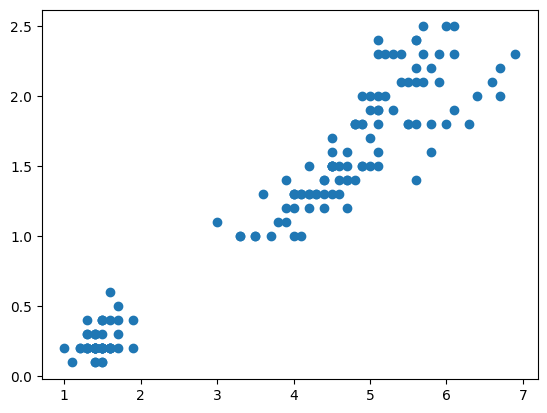

In [9]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])
plt.show()

In [10]:
df.drop(["sepal length (cm)","sepal width (cm)"],axis="columns",inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)

In [12]:
df["cluster"] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [17]:
df.shape

(150, 3)

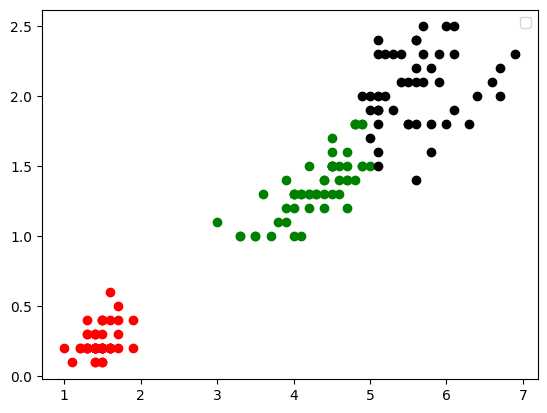

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color='green')
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color='red')
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color='black')
plt.legend()

In [32]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sse.append(km.inertia_)

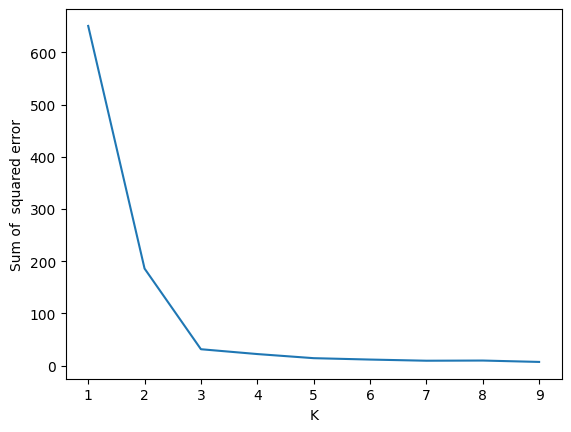

In [33]:
plt.xlabel("K")
plt.ylabel("Sum of  squared error")
plt.plot(k_rng,sse)